# [Data Preparation & Exploration](https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook)

## Data Description

* row : 보험 계약자
* col : 여러 기능
* target : 청구가 접수 되었는지 여부
* Data Link : [Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data)
* 필사 Link : [Data Preparation & Exploration](https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook)

## Data EDA

### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

#### 모듈 설명

from sklearn.impute import SimpleImputer
* Imputer가 scikit-learn 이 버전이 업되면서 삭제되었습니다.
* Imputer를 사용하려면 'from sklearn.impute import SimpleImputer'를 사용합니다.
* 누락된 값을 여러가지 계산 방법으로 채워줍니다.

from sklearn.preprocessing import PolynomialFeatures
* Generate polynomial and interaction features.
* 다항식 및 상호작용 feature를 생성합니다.

from sklearn.preprocessing import StandardScaler
* Standardize features by removing the mean and scaling to unit variance.
* 평균을 제거하고 단위 분산에 맞게 조정하여 feature를 표준화합니다.

from sklearn.feature_selection import VarianceThreshold
* Feature selector that removes all low-variance features.
* 모든 저분산의 feature 들을 제거하는 feature 선택기

from sklearn.feature_selection import SelectFromModel
* Meta-transformer for selecting features based on importance weights.
* 중요 가중치에 따라 feature 들을 선택하기 위한 Meta-transformer

from sklearn.utils import shuffle
* Shuffle arrays or sparse matrices in a consistent way.
* 일관된 방식으로 배열 또는 희소 행렬을 섞습니다.

[pd.set_option](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)
* DataFrame 관련 여러 옵션 설정
* 표시되는 열의 최대 수가 100개 입니다.

### Loading data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print('train.shape =', train.shape)
display(train.head())
display(train.tail())
print('test.shape =', test.shape)

train.shape = (595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


test.shape = (892816, 58)


In [4]:
train.drop_duplicates()
train.shape

(595212, 59)

중복되는 행은 없습니다.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

### Metadata

In [6]:
data = []
for f in train.columns:
    # 타겟과 id 설정하고 나머지는 input 값으로
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    # 데이터의 종류에 따라 분류
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    # id 말고 일단 keep 값을 True로 해놓기
    keep = True
    if f == 'id':
        keep = False
    
    # 데이터 타입 불러오기
    dtype = train[f].dtype
    
    # 변수에 따른 여러 메타 데이터 사전으로 저장
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)

# 저장된 사전을 데이터 프레임으로 변환
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
# index를 varname 값으로 하기
meta.set_index('varname', inplace=True)

In [7]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [8]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

id 말고 nominal인 애들을 가져옵니다.(nominal은 카테고리형 데이터 개수 셀때)

In [9]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


role 과 level 에 따라 각 몇개가 있는지를 출력합니다.

### Mescriptive statistics(기술 통계)

* describe method를 사용해보기.

#### Interval (간격)

In [10]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


meta의 level 값이 'interval' 이고 keep이 true인 condition에 해당하는 train의 값들(열)을 describe() 합니다.

#### Ordinal(서수 : 순서를 나타내는 수)

In [11]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


meta의 level 값이 'Ordinal' 이고 keep이 true인 condition에 해당하는 train의 값들(열)을 describe() 합니다.

#### Binary

In [12]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
print(v)
train[v].describe()

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object', name='varname')


,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


meta의 level 값이 'Binary' 이고 keep이 true인 condition에 해당하는 train의 값들(열)을 describe() 합니다.

### Handling imbalanced classes

* target이 1인 경우인 수가 0인 경우의 수보다 너무 작다.
* 이런 불균형한 데이터는 accuracy의 신용도가 낮을 수 있다.
* 해결방법
  1. target = 1 oversampling
  2. target = 0 undersampling
* 해당 코드는 undersampling 사용

In [13]:
# 감소 비율
desired_apriori=0.10

# 타겟 값에 따른 index 가져오기
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# 타겟 값에 따른 개수 가져오기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

print(nb_0)
print(nb_1)

# 언더샘플링 비율 = (전체에서 감소된 비율 * target 1인 개수) / (감소 비율 * target 0인 개수)
undersampling_rate = ((1-desired_apriori)*nb_1)/(desired_apriori * nb_0)
# 언더 샘플된 target 0 인 값의 개수 = int (언더샘플링 비율 * target 0인 개수)
undersampled_nb_0 = int(undersampling_rate*nb_0)

print(undersampled_nb_0)

print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# target이 0인 값의 index 중에서 랜덤하게 언더샘플 개수 만큼 가져오기
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# target이 1인 index와 합치기
idx_list = list(undersampled_idx) + list(idx_1)

# 새로 만든 index 리스트로 새로운 dataframe 만들기
train = train.loc[idx_list].reset_index(drop=True)

573518
21694
195246
Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


### Data Quality Checks

#### Check missing values

In [14]:
vars_with_missing = []

for f in train.columns:
    # -1인 값인 경우 missing 값입니다.
    # 각 열마다 -1인 값의 개수를 셉니다.
    missings = train[train[f] == -1][f].count()
    # -1인 값이 있다면
    if missings > 0:
        # 해당 열(이름)을 추가합니다.
        vars_with_missing.append(f)
        # 열의 전체 값 중 missing 값의 비율을 구합니다.
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [15]:
# 너무 많은 missing 값을 가지고 있는 경우에는 열 자체를 제거합니다.
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
# meta 에서 keep을 false 로 바꿔줌으로써 사용하지 않는 다는 것으로 갱신합니다.
meta.loc[(vars_to_drop),'keep'] = False

# from sklearn.impute import SimpleImputer
# mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)
# mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

* 기존 Imputer 와 다르게 [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)는 col 파라미터가 없습니다.
* 그리고 기본적으로 col 으로 계산합니다.
* fit_transform 은 [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)에 있습니다.
* 단순하게 보면 우리가 정해준 Imputer의 방식에 따라 해당 열에 적용하는 것입니다.
* fit_transform 은 input을 2차원 행렬로 받지만 결국 다시 1차원으로 바꿔줘야 하므로 flatten() 역할을 하는 ravel() 사용

#### Checking the cardinality of the categorical variables

In [16]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


* 우리가 사용하는 열에서 nominal인 경우에 서로 다른 값이 몇개나 있는지 확인합니다.
* 카테고리형 데이터를 정규화해봅시다.

In [17]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

* Source : [Python target encoding for categorical features](https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features)

assert : 가정 조건문
* 어떤 조건이 True 일때 코드가 돌아감을 보장
* 그러니 해당 조건이 False 이면 내가 보증하지 않음

카테고리 Data의 평탄화 작업
* train과 test를 사슬 연결합니다. - temp
* temp를 target에 대한 그룹의 평균과 개수를 구하여 averages에 넣습니다.
* smoothing 을 sigmoid 함수와 smoothing 변수를 통해 구합니다. (초기값 1)
* target의 평균을 구합니다.
* target에 비율 + average의 비율로 새로운 averages 를 구합니다.
* 기존의 average의 평균 개수를 제거합니다.
* train series를 데이터 프레임 형태로 마든뒤
* average 의 index를 리셋한뒤 열의 이름들을 각각 변경해줍니다.
* [pandas merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
* on : 합쳐질 열
* how : 합칠때 사용할 방법

In [18]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

## Exploratory Data Visualization

### Categorical variables

* nominal(카테고리) 애들 중에 제거되지 않은 열들
* [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
* as_index = True시 에러 발생
* as_index : For aggregated output, return object with group labels as the index.
* 우리가 이 group label을 사용해야하기 때문에 index로 안 만드는 것 같습니다.
* target에 따라 내림차순 정렬하고 변화 적용
* barplot(order : 카테고리 레벨을 그림)
* tick_params : 구분 표시점에 대해 여러 값 적용(여기선 글자 크기)

<Figure size 432x288 with 0 Axes>

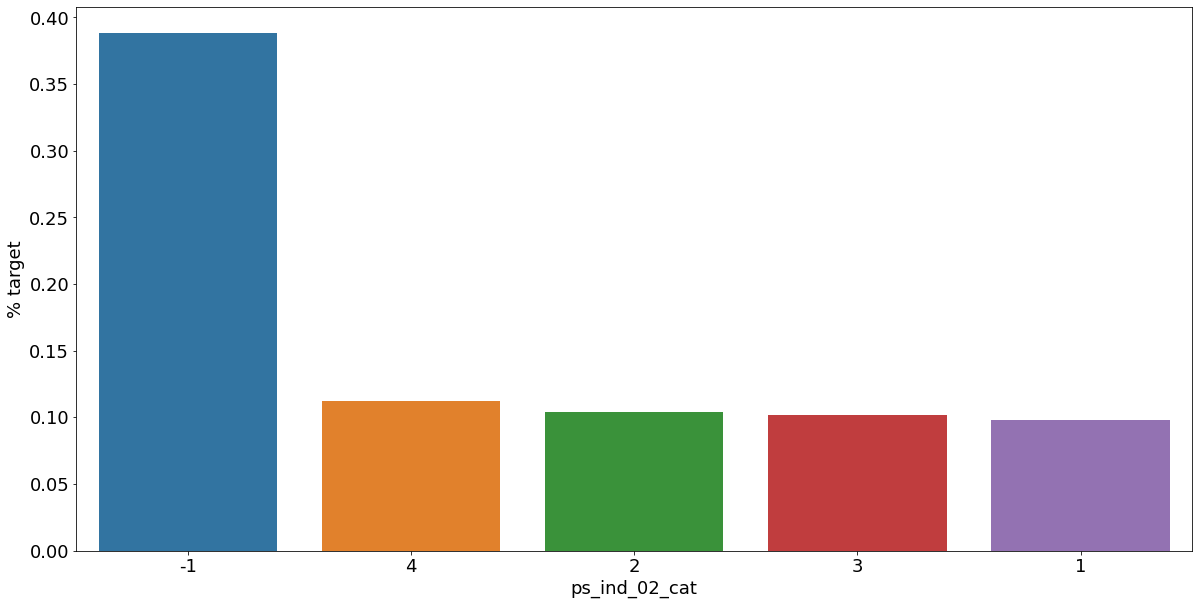

<Figure size 432x288 with 0 Axes>

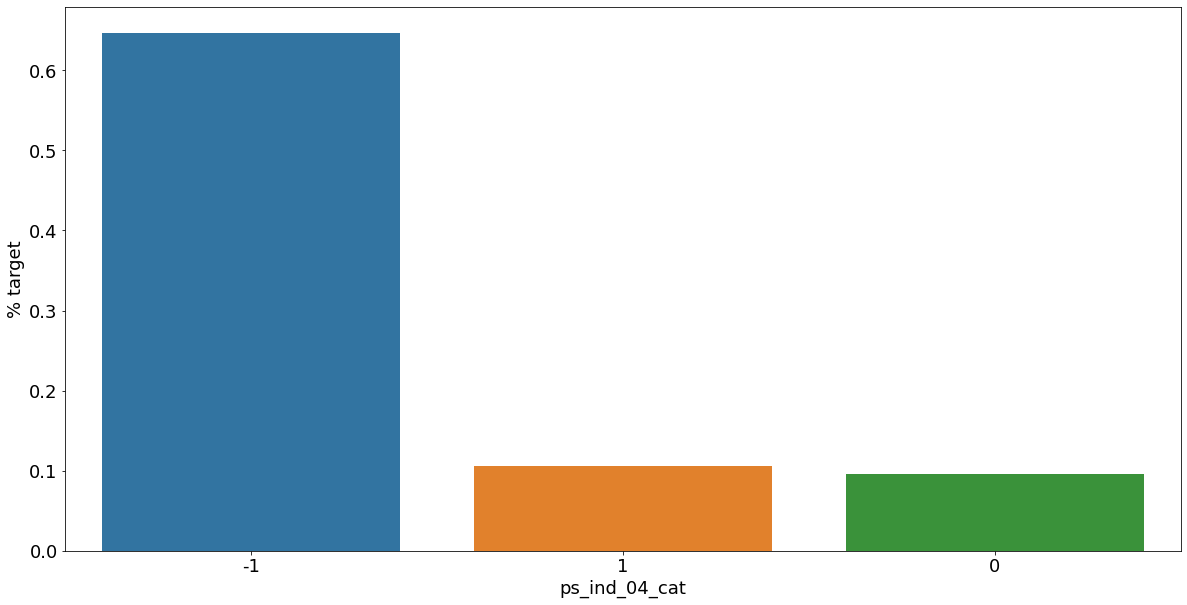

<Figure size 432x288 with 0 Axes>

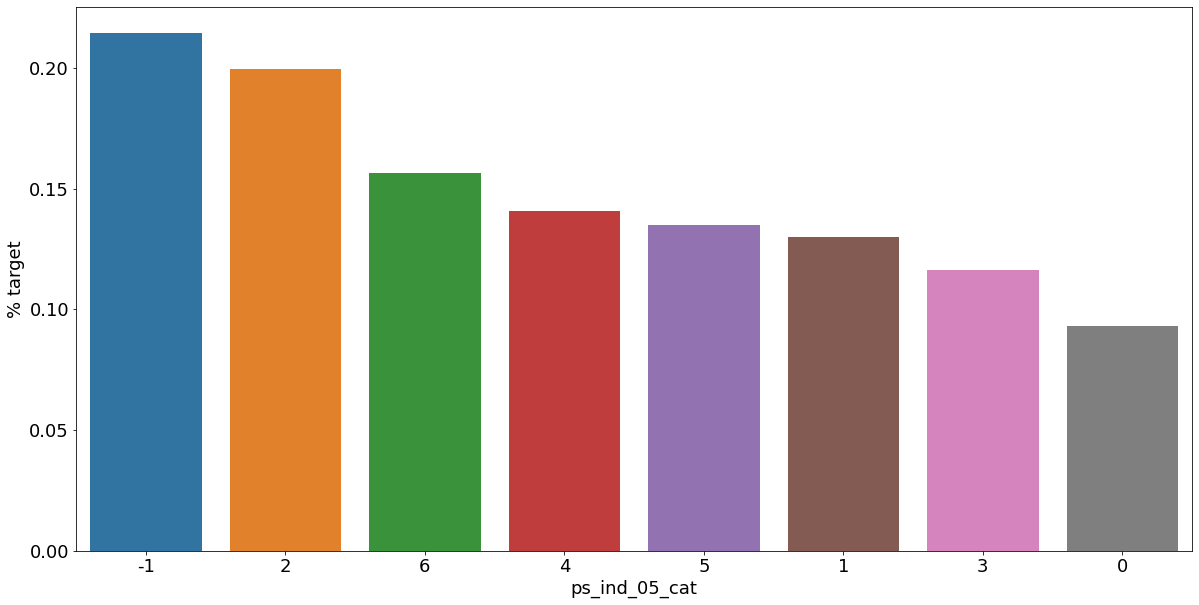

<Figure size 432x288 with 0 Axes>

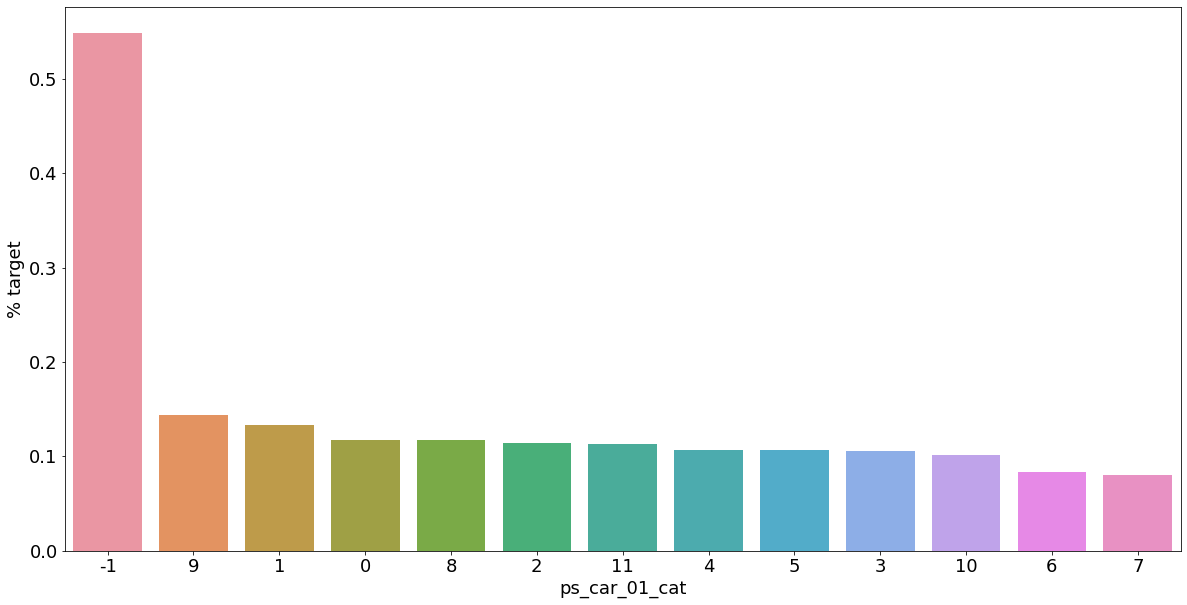

<Figure size 432x288 with 0 Axes>

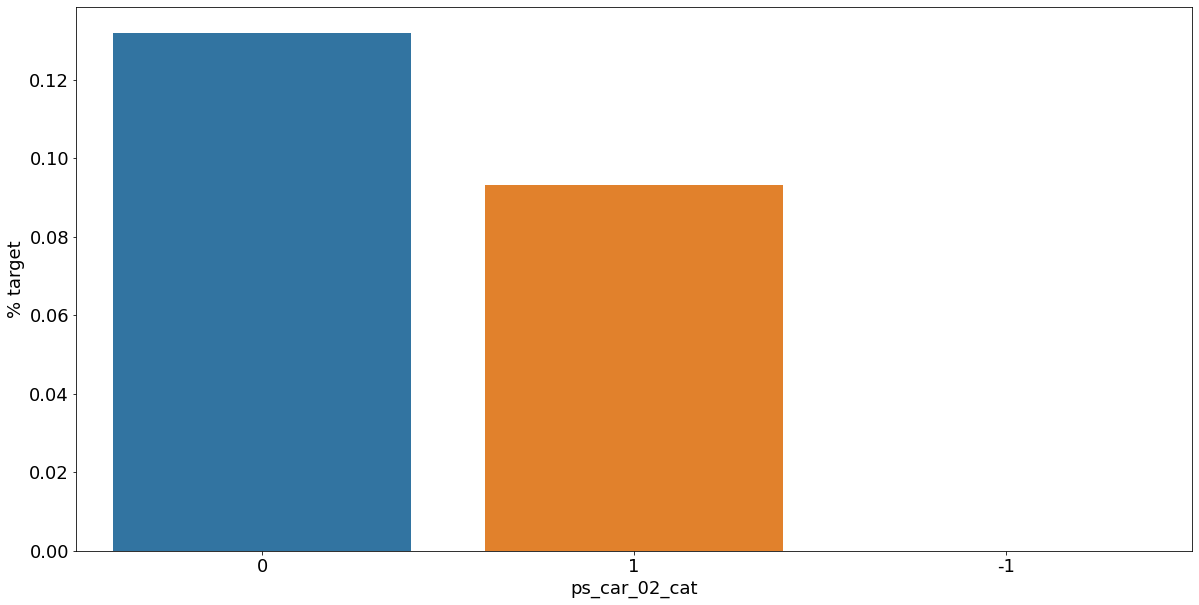

<Figure size 432x288 with 0 Axes>

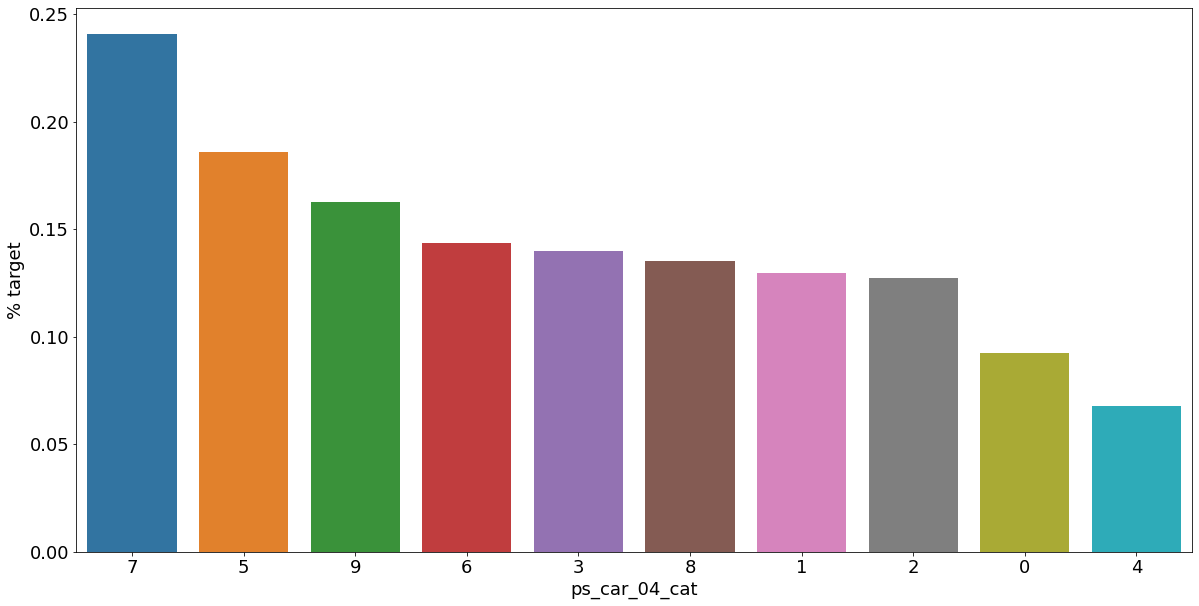

<Figure size 432x288 with 0 Axes>

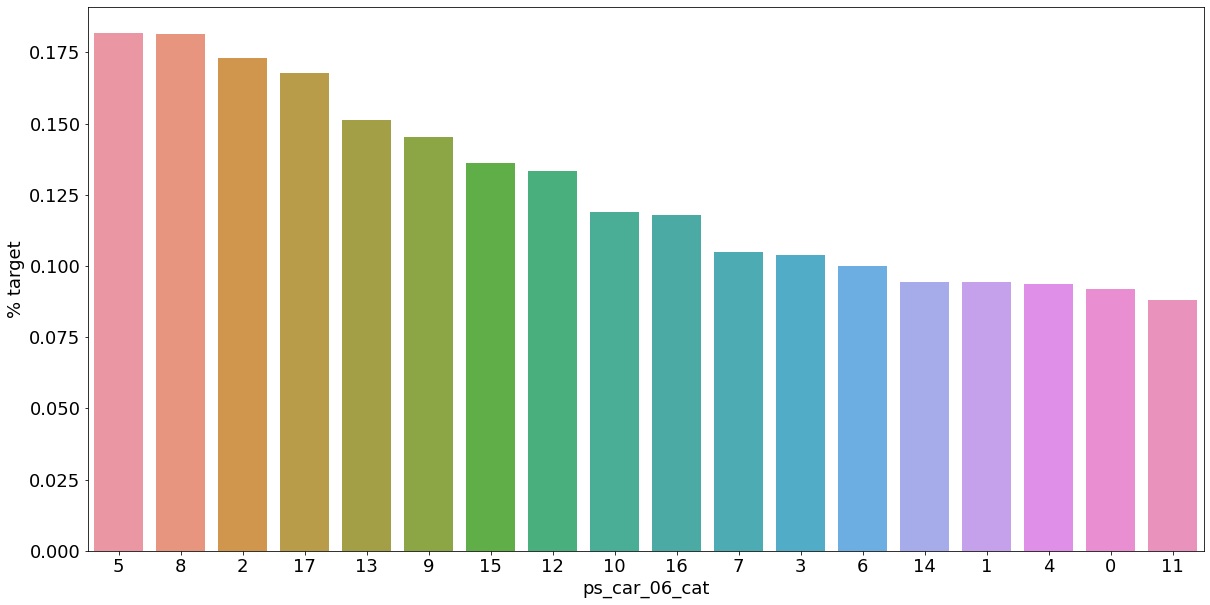

<Figure size 432x288 with 0 Axes>

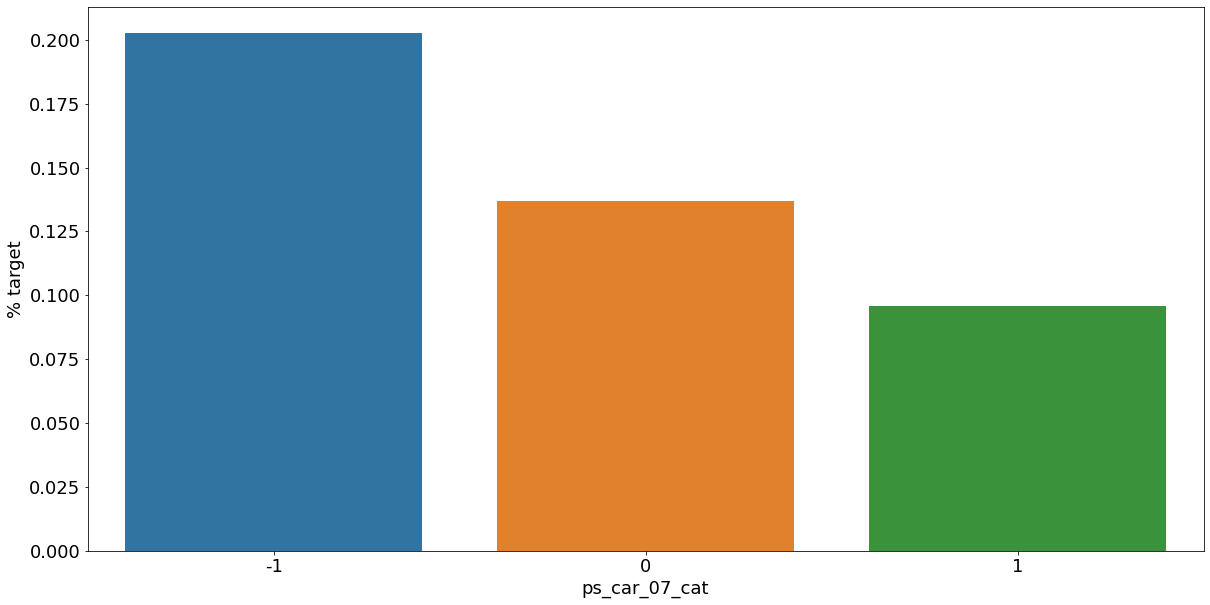

<Figure size 432x288 with 0 Axes>

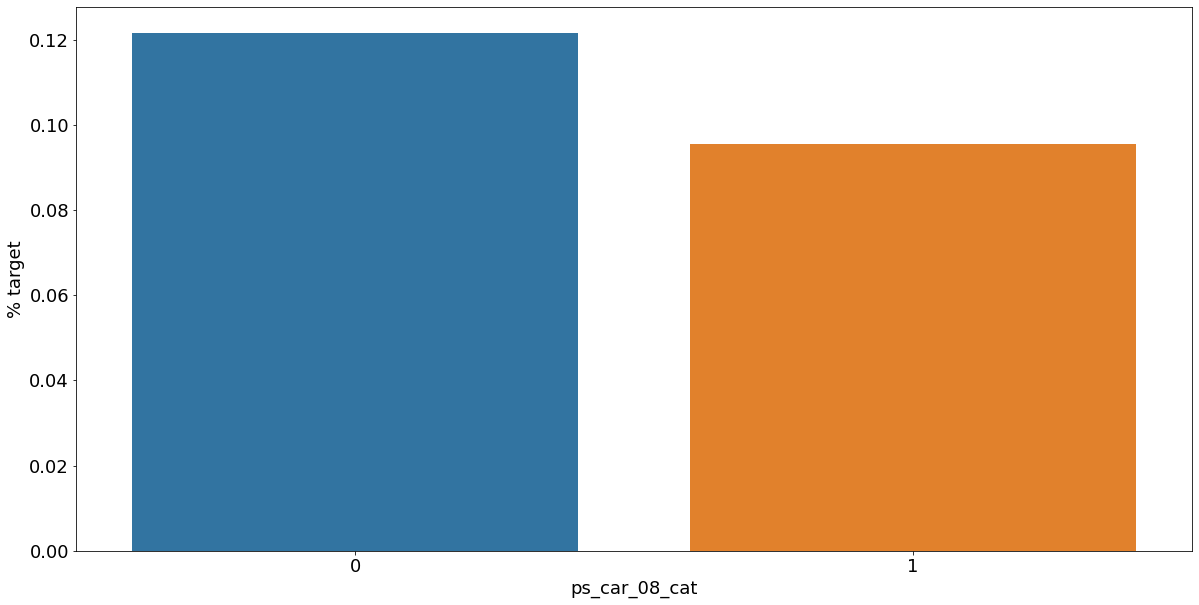

<Figure size 432x288 with 0 Axes>

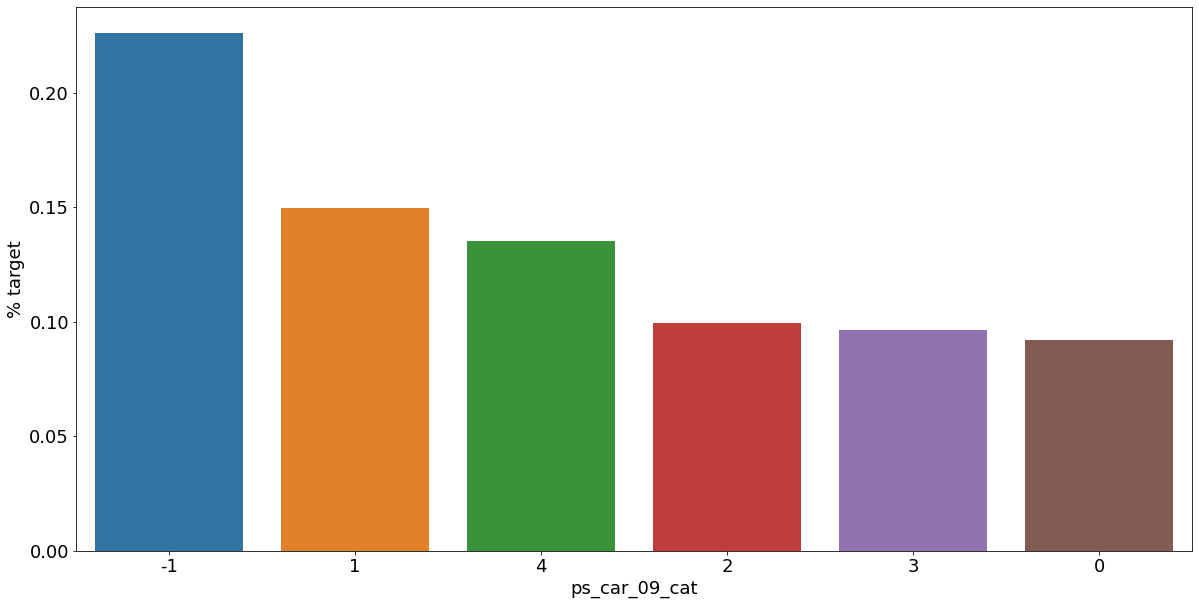

<Figure size 432x288 with 0 Axes>

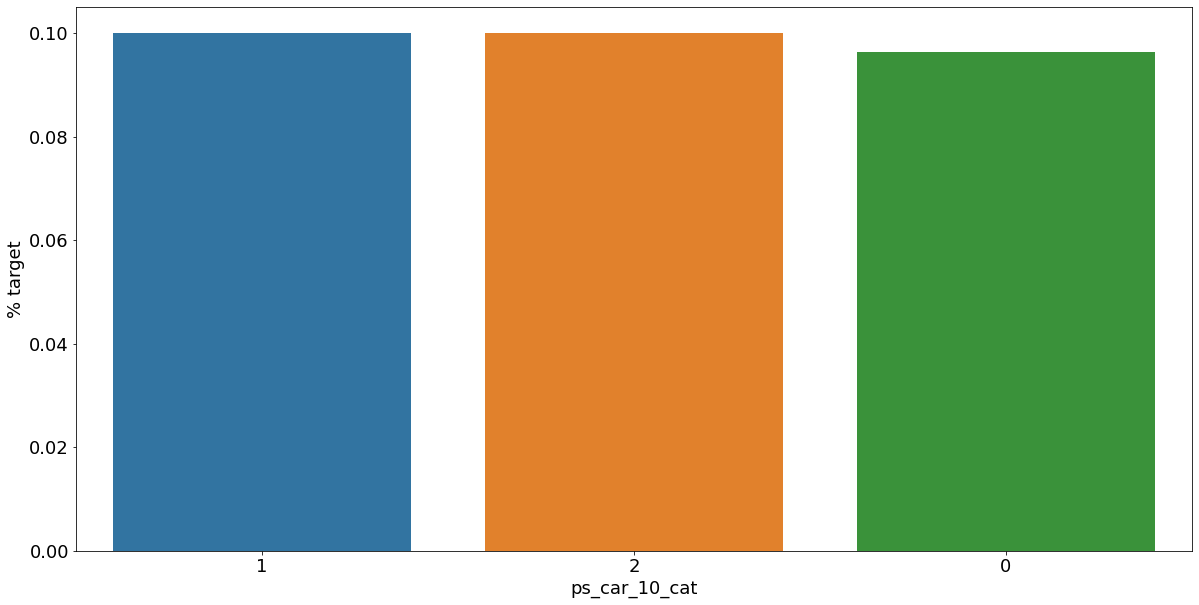

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    # cat_perc = train[[f, 'target']].groupby([f],as_index=True).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

### Interval variables

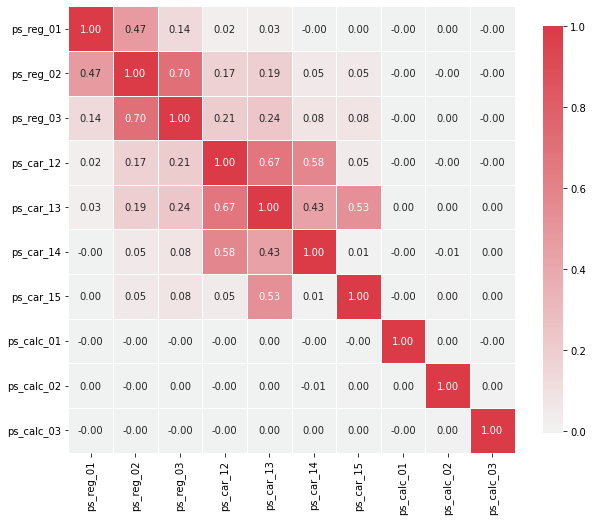

In [20]:
def corr_heatmap(v):
    correlations = train[v].corr()
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # cmap = sns.diverging_palette(320, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

* 해당 열에 대한 상관계수 구하기
* [sns.diverging_palette](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html) : 색의 변화량을 결정
* [sns.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [21]:
print(train.shape)
s = train.sample(frac=0.1)
print(s.shape)
s

(216940, 57)
(21694, 57)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te
7796,1156243,0,3,1,8,0,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.9,1.221167,8,1,0,4,1,1,0,1,3,0.446990,0.515824,0.435316,0.000000,0.2,0.1,0.1,3,2,8,1,9,3,6,5,0,2,10,0,0,0,0,0,1,0.117363
132471,470272,0,7,1,4,1,3,0,0,1,0,0,0,0,0,0,13,1,0,0,0.9,1.2,1.272055,11,0,1,9,1,1,1,1,3,0.447214,0.994177,0.374166,3.316625,0.8,0.7,0.8,4,1,5,2,10,1,6,4,3,5,9,1,0,0,0,1,0,0.122010
158629,52850,0,7,1,5,1,6,0,0,1,0,0,0,0,0,0,12,1,0,0,0.1,0.3,0.898861,0,1,0,11,1,1,0,1,3,0.374166,0.769311,0.385097,3.162278,0.7,0.2,0.8,4,3,7,1,10,1,4,10,3,4,6,0,0,0,1,1,0,0.107477
185519,1110827,0,0,1,8,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0.9,1.7,1.599805,10,1,2,0,1,1,0,1,0,0.399750,0.768988,0.423084,3.464102,0.6,0.9,0.5,2,2,9,3,8,1,7,6,1,3,4,0,1,1,0,0,0,0.137601
201092,397078,1,5,1,3,1,0,0,0,1,0,0,0,0,0,0,12,0,1,0,0.9,0.3,0.878208,9,0,0,11,1,1,2,1,3,0.424264,0.890582,0.354260,3.316625,0.7,0.8,0.9,1,2,7,4,11,4,14,7,0,1,9,0,0,1,0,0,0,0.071814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,537574,0,1,1,8,0,0,1,0,0,0,0,0,0,0,0,11,1,0,0,0.0,0.0,0.898861,7,1,0,0,1,1,2,1,3,0.316228,0.749228,0.361525,3.605551,0.1,0.8,0.6,3,1,8,2,10,2,5,4,2,6,9,0,0,1,0,0,0,0.088442
127769,847366,0,0,2,3,1,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.3,0.532682,7,1,0,1,1,0,2,1,1,0.316228,0.768289,0.359861,3.741657,0.3,0.2,0.6,3,1,7,5,9,3,9,5,2,6,12,0,1,0,1,1,0,0.086648
183418,1053274,0,6,1,8,0,0,0,1,0,0,0,0,0,0,0,3,0,1,0,0.9,0.9,1.081954,11,0,0,4,1,0,2,1,2,0.447214,1.266039,0.370405,3.605551,0.3,0.8,0.2,1,1,8,5,8,3,11,6,2,3,4,0,0,0,1,0,0,0.120807
87458,414018,0,0,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.5,0.2,0.561249,11,1,0,11,1,1,2,1,3,0.447214,0.823292,0.406202,3.316625,0.9,0.6,0.2,3,2,8,4,10,3,8,9,0,2,6,0,1,0,0,0,0,0.070896


랜덤으로 샘플 뽑아내는 것

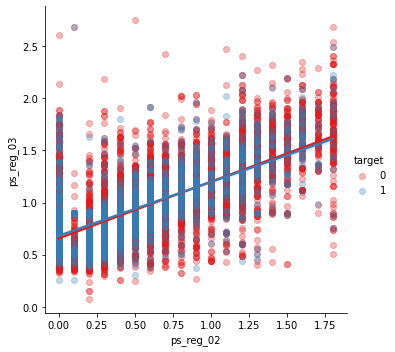

In [22]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

* [Implot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) : regplot() 과 FacetGrid 합친것
* palette : 색 조합
* scatter_kws : plt.scatter에 해당하는 키워드 연결

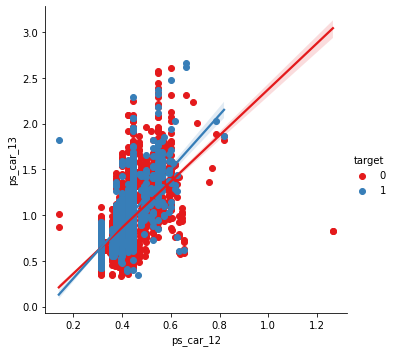

In [34]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':1})
plt.show()

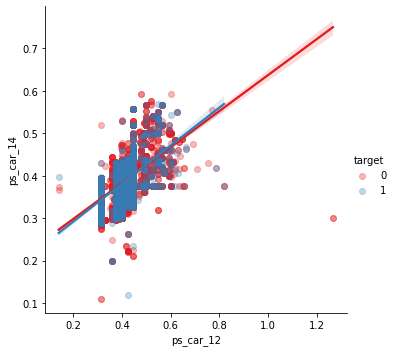

In [24]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

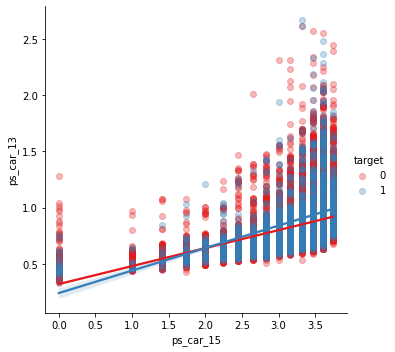

In [25]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

###  Checking the correlations between ordinal variables

ordinal 열간의 상관관계를 heatmap으로 나타내봅시다.

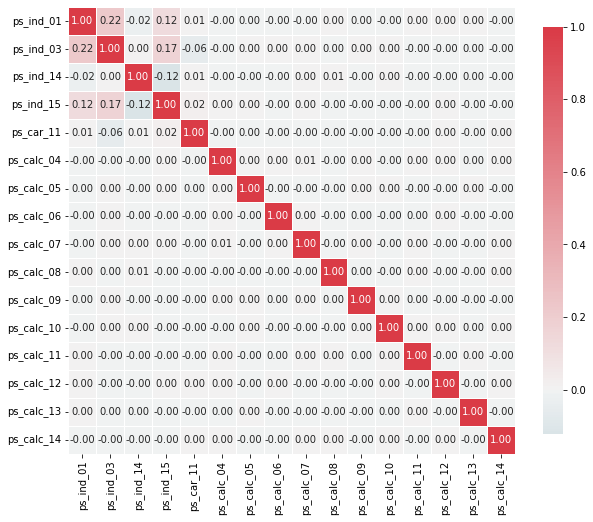

In [26]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## Feature engineering

### one-hot encoding

In [27]:
from re import A


v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


### Creating interaction variables

In [28]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


/home/aiffel/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


* [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* [다항 회귀](https://inuplace.tistory.com/515)
* 현재 데이터의 다항식의 형태로 변환함(각 특성의 제곱 또는 그 이상을 추가)
* degree 옵션으로 차수를 조절
* 이 다항식 모델에 train[v]로 학습시켜 새로운 데이터를 얻습니다.
* 얻은 데이터와 특징 이름에 따라 새로운 데이터 프레임을 만듭니다.
* 원본 열을 제거합니다.
* 바뀐 열의 개수를 비교합니다.

## Feature selection

### Removing features with low or zero variance

In [29]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) : 분산이 작은 특징들을 가져옵니다.
* id와 target을 제외한 데이터로 학습합니다.
* function : boolean 값으로 바꿔주는 함수 f 만듬
* get_support() : 선택된 특징의 마스크를 얻습니다.(의미가 있는 데이터와 없는 데이터를 구분하는 것)
* [마스킹](https://wiserloner.tistory.com/1061)

### Selecting features with a Random Forest and SelectFromModel

* random forest로 feature importance 를 구해봅시다.

In [30]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

# rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

print(importances.shape)

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

(162,)
 1) ps_car_11_cat_te               0.020858
 2) ps_car_13 ps_car_14            0.017288
 3) ps_car_13^2                    0.017277
 4) ps_reg_03 ps_car_13            0.017228
 5) ps_car_13                      0.017108
 6) ps_car_13 ps_car_15            0.017030
 7) ps_car_12 ps_car_13            0.017014
 8) ps_reg_01 ps_car_13            0.016693
 9) ps_reg_03 ps_car_14            0.016450
10) ps_reg_03 ps_car_12            0.015811
11) ps_reg_03 ps_car_15            0.015252
12) ps_car_14 ps_car_15            0.014988
13) ps_car_13 ps_calc_01           0.014734
14) ps_car_13 ps_calc_03           0.014685
15) ps_car_13 ps_calc_02           0.014638
16) ps_reg_01 ps_reg_03            0.014586
17) ps_reg_02 ps_car_13            0.014459
18) ps_reg_01 ps_car_14            0.014415
19) ps_reg_03                      0.014412
20) ps_reg_03^2                    0.014398
21) ps_reg_03 ps_calc_03           0.013787
22) ps_reg_03 ps_calc_02           0.013734
23) ps_calc_10           

* X : id, target 제거 한 data
* y : target
* random forest 로 학습하고 feature importance를 구합니다.
* 구한 중요도의 내림차순으로 출력

In [31]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


/home/aiffel/.local/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


* [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) : Meta-transformer for selecting features based on importance weights.
* 모델 훈련이 끝난 후 사용자가 지정한 임계값을 기반으로 특성 선택
* transform(X) : Reduce X to the selected features.
* X_train을 지정된 특징들로 줄인뒤의 개수

In [32]:
train = train[selected_vars + ['target']]

## Feature scaling

In [33]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* 표준화 : 표준정규분포의 속성을 갖도록 feature 들을 재조정
* [표준화](https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94)